In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
sns.set()
from sklearn.metrics import roc_curve,auc,accuracy_score, precision_score, recall_score, f1_score

In [29]:
input = "anemia_dataset.csv"

In [30]:
df=pd.read_csv(input)
df.head()

,gender(0_male and 1_female),Hemoglobin,mch,mchc,mcv,result
0,1,14.9,22.7,29.1,83.7,0
1,0,15.9,25.4,28.3,72.0,0
2,0,9.0,21.5,29.6,71.2,1
3,0,14.9,16.0,31.4,87.5,0
4,1,14.7,22.0,28.2,99.5,0


In [31]:
df['result'].value_counts()

result
0    801
1    620
Name: count, dtype: int64

In [32]:
df.isnull().sum()

gender(0_male and 1_female)    0
Hemoglobin                     0
mch                            0
mchc                           0
mcv                            0
result                         0
dtype: int64

In [33]:
df.describe()

,gender(0_male and 1_female),Hemoglobin,mch,mchc,mcv,result
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000
mean,0.520760,13.412738,22.905630,30.251232,85.523786,0.436312
std,0.499745,1.974546,3.969375,1.400898,9.636701,0.496102
min,0.000000,6.600000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


In [34]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [35]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('result', axis=1))

In [36]:
df.describe()

,gender(0_male and 1_female),Hemoglobin,mch,mchc,mcv,result
count,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000,1420.000000
mean,0.521127,13.417535,22.901549,30.250704,85.526549,0.435915
std,0.499729,1.966938,3.967791,1.401250,9.639533,0.496051
min,0.000000,6.900000,16.000000,27.800000,69.400000,0.000000
25%,0.000000,11.700000,19.400000,29.000000,77.300000,0.000000
50%,1.000000,13.200000,22.700000,30.400000,85.300000,0.000000
75%,1.000000,15.000000,26.200000,31.400000,94.200000,1.000000
max,1.000000,16.900000,30.000000,32.500000,101.600000,1.000000


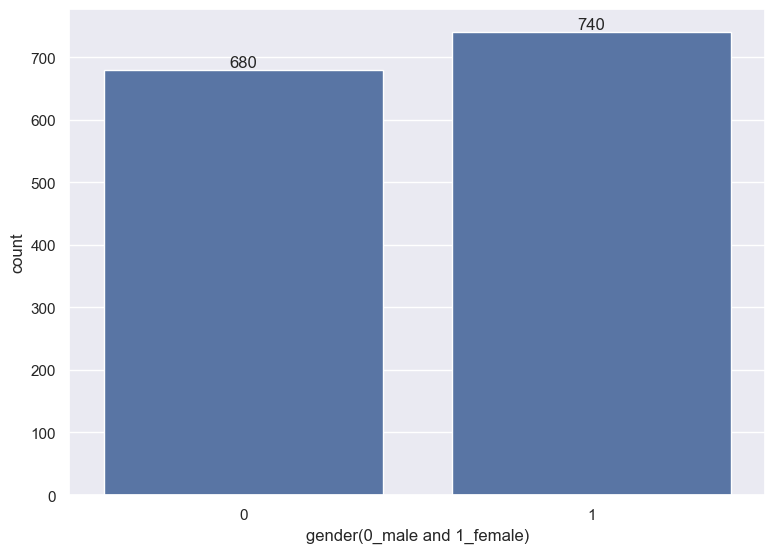

In [37]:
#Univariate analysis
plt.figure(figsize=(8,6))
ax = sns.countplot(x = df['gender(0_male and 1_female)'])
ax.bar_label(ax.containers[0])
plt.show()

In [38]:
train_X, test_X, train_Y, test_Y = train_test_split(
    scaled_features, df['result'], test_size=0.2, random_state=42
)
X= df[df.columns[:-1]]
Y= df['result']
len(train_X), len(train_Y), len(test_X), len(test_Y)

(1136, 1136, 284, 284)

In [39]:
scaled_features.shape

(1420, 5)

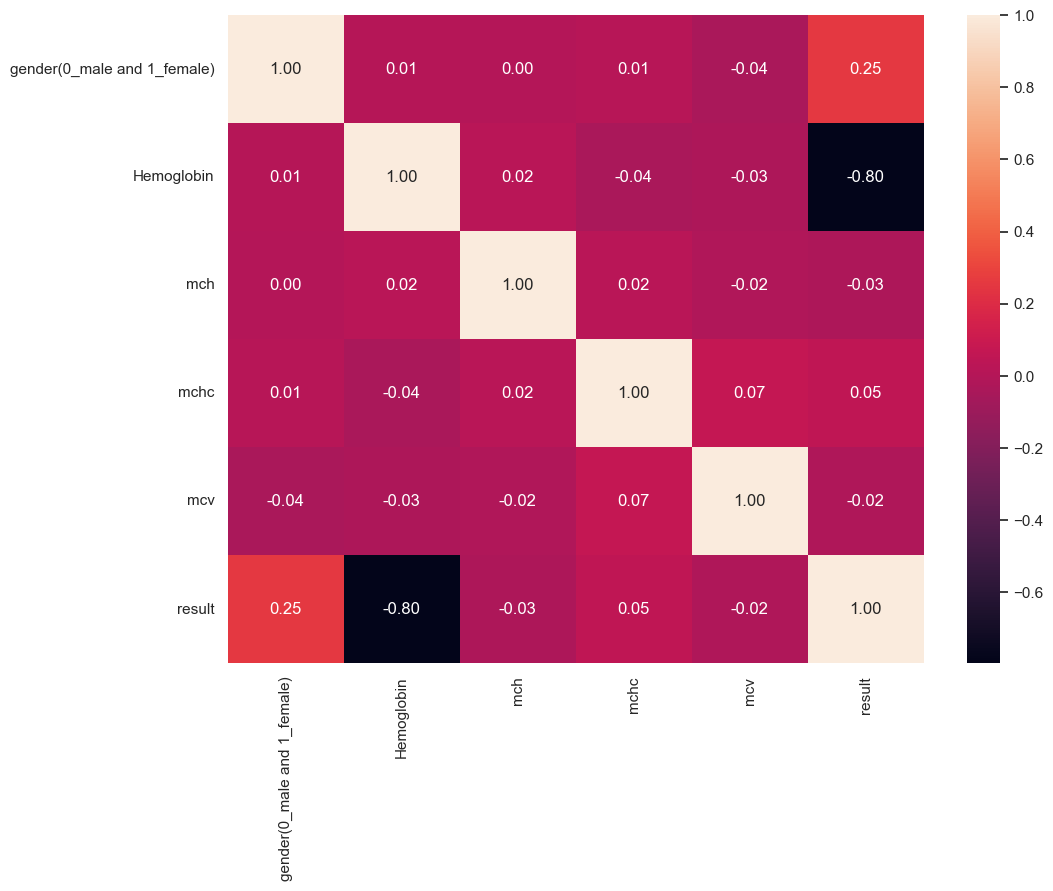

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the KNN model with a specific k value
k_value = 11  # You can change this to any integer you want
clf = KNeighborsClassifier(n_neighbors=k_value)
clf.fit(train_X,train_Y)
pred_knn= clf.predict(test_X)
pred_knn_proba=clf.predict_proba(test_X)[:, 1]

In [42]:
pred= pred_knn
accuracy = accuracy_score(test_Y, pred)
precision = precision_score(test_Y, pred)
recall = recall_score(test_Y, pred)
f1 = f1_score(test_Y, pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9471830985915493
Precision: 0.9148936170212766
Recall: 0.9772727272727273
F1 Score: 0.945054945054945


In [43]:
filename = 'knn.pkl'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)
print(f"Model saved to {filename}")

Model saved to knn.pkl


In [44]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model with specific parameters
n_estimators = 100  # The number of trees in the forest
max_depth = 1    # The maximum depth of the trees
clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
clf.fit(train_X, train_Y)
pred_rfc= clf.predict(test_X)
pred_rfc_proba=clf.predict_proba(test_X)[:, 1]

In [45]:
pred= pred_rfc
accuracy = accuracy_score(test_Y, pred)
precision = precision_score(test_Y, pred)
recall = recall_score(test_Y, pred)
f1 = f1_score(test_Y, pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9154929577464789
Precision: 0.86
Recall: 0.9772727272727273
F1 Score: 0.9148936170212766


In [46]:
filename = 'RandomForest.pkl'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)
print(f"Model saved to {filename}")

Model saved to RandomForest.pkl


In [68]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

# Instantiate the model with specific parameters
max_depth = 2  # The maximum depth of the tree
clf = DecisionTreeClassifier(max_depth=max_depth)
clf.fit(train_X,train_Y)
pred_dt= clf.predict(test_X)
pred_dt_proba=clf.predict_proba(test_X)[:, 1]

In [48]:
pred= pred_dt
accuracy = accuracy_score(test_Y, pred)
precision = precision_score(test_Y, pred)
recall = recall_score(test_Y, pred)
f1 = f1_score(test_Y, pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8943661971830986
Precision: 0.8148148148148148
Recall: 1.0
F1 Score: 0.8979591836734693


[Text(0.6, 0.8333333333333334, 'x[1] <= 0.017\ngini = 0.49\nsamples = 1136\nvalue = [649, 487]'),
 Text(0.4, 0.5, 'x[0] <= -0.042\ngini = 0.322\nsamples = 610\nvalue = [123, 487]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.49\nsamples = 286\nvalue = [123, 163]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 324\nvalue = [0, 324]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 526\nvalue = [526, 0]')]

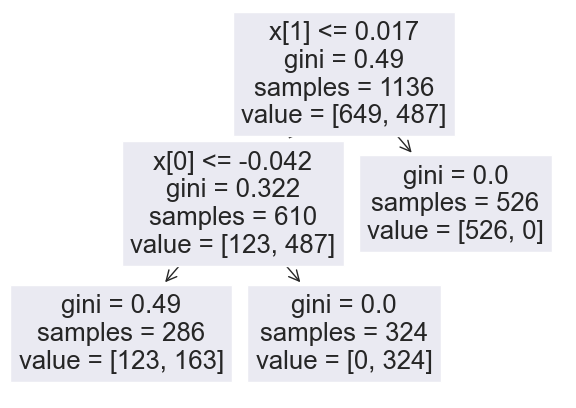

In [70]:
plot_tree(clf)

In [50]:
filename = 'decisiontree.pkl'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)

print(f"Model saved to {filename}")

Model saved to decisiontree.pkl


In [51]:
from sklearn.naive_bayes import GaussianNB

# Instantiate the model with specific priors
priors = [0.6, 0.4]  # Prior probabilities of the classes
clf = GaussianNB(priors=priors)
clf.fit(train_X,train_Y)
pred_nb= clf.predict(test_X)
pred_nb_proba=clf.predict_proba(test_X)[:, 1]

In [52]:
pred= pred_nb
accuracy = accuracy_score(test_Y, pred)
precision = precision_score(test_Y, pred)
recall = recall_score(test_Y, pred)
f1 = f1_score(test_Y, pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9190140845070423
Precision: 0.8920863309352518
Recall: 0.9393939393939394
F1 Score: 0.915129151291513


In [53]:
filename = 'GaussianNB.pkl'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)

print(f"Model saved to {filename}")

Model saved to GaussianNB.pkl


In [54]:
from xgboost import XGBClassifier

# Instantiate the model with specific parameters
learning_rate = 0.01  # Step size shrinkage used in update to prevent overfitting
max_depth = 1        # Maximum depth of a tree
clf = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth)
clf.fit(train_X,train_Y)
pred_xgb= clf.predict(test_X)
pred_xgb_proba=clf.predict_proba(test_X)[:, 1]

In [55]:
pred= pred_xgb
accuracy = accuracy_score(test_Y, pred)
precision = precision_score(test_Y, pred)
recall = recall_score(test_Y, pred)
f1 = f1_score(test_Y, pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8908450704225352
Precision: 0.8531468531468531
Recall: 0.9242424242424242
F1 Score: 0.8872727272727272


In [56]:
filename = 'XGBoost.pkl'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)

print(f"Model saved to {filename}")

Model saved to XGBoost.pkl


In [57]:
model_predictions = {
    "Decision tree": pred_dt,
    "K-nearest neighbours": pred_knn,
    "Gaussian Naive Bayes": pred_nb,
    "XGBoost": pred_xgb,
    "Random Forest": pred_rfc
}


In [58]:
roc_auc_data = {}

for model_name, predictions in model_predictions.items():
    fpr, tpr, thresholds = roc_curve(test_Y, predictions)
    roc_auc = auc(fpr, tpr)
    roc_auc_data[model_name] = (fpr, tpr, roc_auc)


In [59]:
from sklearn.metrics import confusion_matrix

conf_matrices = {model_name: confusion_matrix(test_Y, predictions) 
                 for model_name, predictions in model_predictions.items()}


In [60]:
all_values = np.array([cm.flatten() for cm in conf_matrices.values()])
vmin = all_values.min()
vmax = all_values.max()


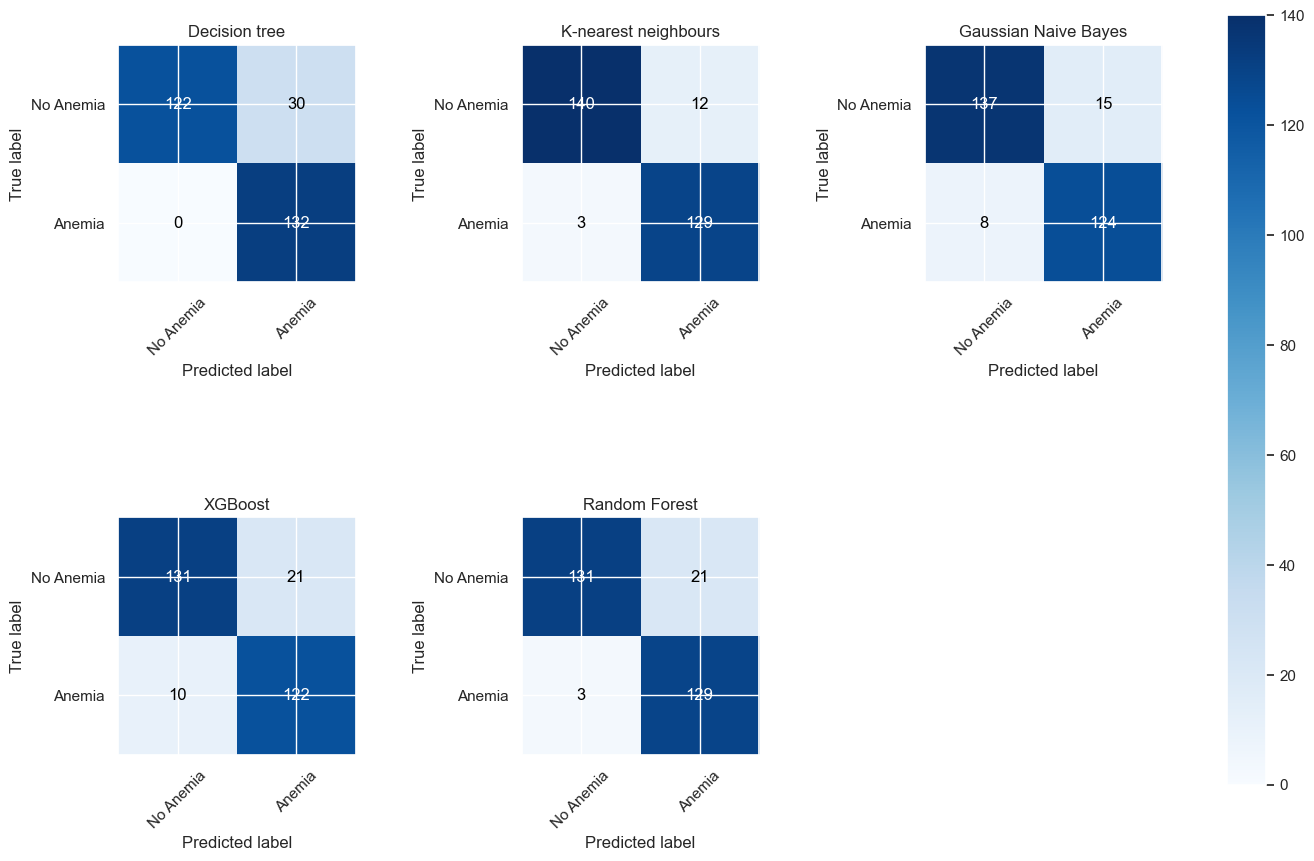

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(ax, cm, classes, title='Confusion matrix', cmap=plt.cm.Blues, vmin=None, vmax=None):
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap, vmin=vmin, vmax=vmax)
    ax.set_title(title)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    # Loop over data dimensions and create text annotations.
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    return im

class_names = ['No Anemia', 'Anemia']
n_models = len(model_predictions)  # Number of models
n_cols = 3  # Assuming you want 3 columns of subplots
n_rows = int(np.ceil(n_models / n_cols))  # Calculate required number of rows

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.7)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot confusion matrices
for ax, (model_name, cm) in zip(axes, conf_matrices.items()):
    im = plot_confusion_matrix(ax, cm, classes=class_names, title=model_name, vmin=vmin, vmax=vmax)

# Hide unused subplots
for i in range(n_models, len(axes)):
    fig.delaxes(axes[i])

# Place a color bar to the right of the subplots
# Adjust the ax parameter based on the actual axes used for plotting
fig.colorbar(im, ax=axes[:n_models].ravel().tolist(), shrink=0.95)

plt.show()




In [62]:
count= np.unique(test_Y,return_counts=True)
count

(array([0, 1], dtype=int64), array([152, 132], dtype=int64))

In [63]:
test_Y.value_counts()

result
0    152
1    132
Name: count, dtype: int64

In [64]:
model_predictions_proba = {
    "Decision tree": pred_dt_proba,
    "K-Neighbour network": pred_knn_proba,
    "Gaussian Naive Bayes": pred_nb_proba,
    "XGBoost": pred_xgb_proba,
    "Random Forest": pred_rfc_proba
}

# Initialize a dictionary to store ROC and AUC data
roc_auc_data = {}

for model_name, model_pred in model_predictions_proba.items():
    fpr, tpr, _ = roc_curve(test_Y, model_pred)
    roc_auc = auc(fpr, tpr)
    roc_auc_data[model_name] = (fpr, tpr, roc_auc)


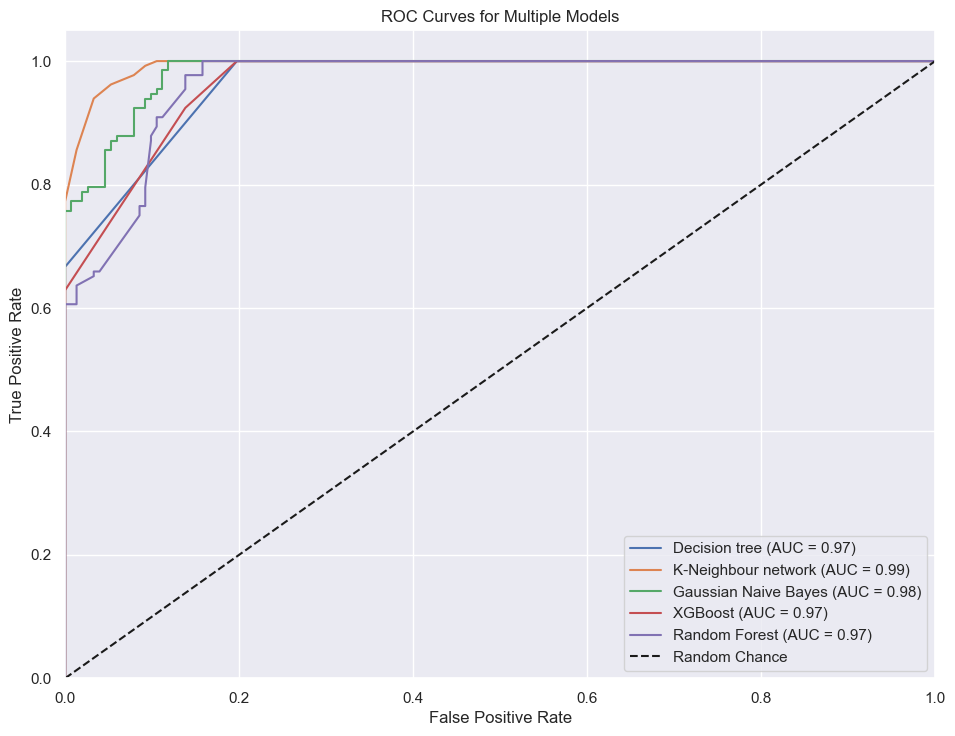

In [65]:
plt.figure(figsize=(10, 8))

# Plot ROC curve for each model
for model_name, (fpr, tpr, roc_auc) in roc_auc_data.items():
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Multiple Models')
plt.legend(loc="lower right")
plt.show()

The provided images represent the output of a machine learning classification task to predict anemia based on certain biomarkers. 

The first image presents confusion matrices for each classifier, detailing the true positives, true negatives, false positives, and false negatives. These matrices provide insights into the type I and type II errors made by the models. For instance, the Random Forest model has a higher number of false positives compared to the Decision Tree model, which may indicate a higher tendency to predict the anemia condition when it is not present. However, it also has fewer false negatives, suggesting it is less likely to miss cases of anemia.

The second image is a Receiver Operating Characteristic (ROC) curve, which shows the performance of various classifiers at different threshold settings. The Area Under the Curve (AUC) values indicate the overall performance of the models, with 1.0 being a perfect model and 0.5 representing a model no better than random chance. The classifiers used include Decision Tree, K-Nearest Neighbors (KNN), Gaussian Naive Bayes, XGBoost, and Random Forest.

From the ROC curve, all models perform significantly better than random chance, indicating strong predictive capabilities. The **K-Nearest Neighbors** and **Gaussian Naive Bayes** models show the highest AUC scores, suggesting they are the best at distinguishing between the anemic and non-anemic classes for the given dataset.

Overall, these visualizations summarize the effectiveness of different classifiers on the anemia prediction task. The strong AUC values across models suggest that the features chosen for the prediction are informative, and the preprocessing steps taken before modeling have likely contributed to the robust performance of these classifiers.

In [67]:
print(sklearn.__version__)

1.3.0
